 <h2>Realizar los ajustes propuestos en la primera entrega</h2>
<p>Analisis mas detallado de las variables a utilizar.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def mytabla(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val], axis=1)
    return mis_val_table

In [3]:
name = r"C:\Users\jibar\OneDrive - Universidad de los andes\Clases_Maestria\CIENCIA DE DATOS\Proyecto\General\General\Data\Daily.csv"

data =pd.read_csv(name,sep='|',error_bad_lines=False, warn_bad_lines= False,index_col=False,header=0, low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396887 entries, 0 to 396886
Data columns (total 20 columns):
id_sitio           396887 non-null int64
corte_evento       396887 non-null bool
Daily_Date         396887 non-null object
VolUnCorrected     396835 non-null object
VolCorrected       396818 non-null object
Pressure           396503 non-null object
Temperature        396503 non-null object
MaxPressure        9114 non-null float64
MaxPressureTime    9114 non-null object
MinPressure        9114 non-null float64
MinPressureTime    9114 non-null object
MaxFlow            9114 non-null float64
maxFlowTime        9114 non-null object
MinFlow            9114 non-null float64
MinFlowTime        9114 non-null object
MaxTemp            9114 non-null float64
maxTempTime        9114 non-null object
MinTemp            9114 non-null float64
MinTempTime        9114 non-null object
id_RTU             396625 non-null float64
dtypes: bool(1), float64(7), int64(1), object(11)
memory usage: 57.9+

In [5]:
data.head()


,id_sitio,corte_evento,Daily_Date,VolUnCorrected,VolCorrected,Pressure,Temperature,MaxPressure,MaxPressureTime,MinPressure,MinPressureTime,MaxFlow,maxFlowTime,MinFlow,MinFlowTime,MaxTemp,maxTempTime,MinTemp,MinTempTime,id_RTU
0,34,False,2013-08-19 23:59:59,"39,390000000000001","727,25",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,81.0
1,163,False,2013-08-21 23:59:59,"1434,9300000000001","24170,799999999999",NaN,NaN,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,3.0
2,40,False,2013-08-19 23:59:59,"7709,2600000000002","69097,570000000007",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,98.0
3,41,False,2013-08-19 23:59:59,"404,13999999999999","7004,7700000000004",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,89.0
4,50,False,2013-08-19 23:59:59,"3296,0100000000002","15331,190000000001",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,87.0


In [6]:
# mytabla(data)

In [7]:
def eliminar_coma(x):
    x=str(x).replace(',','.')
    return x

In [8]:

data['VolUnCorrected']=data['VolUnCorrected'].apply(eliminar_coma)
data['VolCorrected']=data['VolCorrected'].apply(eliminar_coma)
data['Pressure']=data['Pressure'].apply(eliminar_coma)
data['Temperature']=data['Temperature'].apply(eliminar_coma)


convert = {'id_sitio':'object',
          'VolUnCorrected':float,
          'VolCorrected':float,
          'Pressure':float,
          'Temperature':float,
          'MaxPressure':float,
          'MinPressure':float,
          'MaxFlow':float,
          'MinFlow':float,
          'MaxTemp':float,
          'MinTemp':float,
          'id_RTU':'object'}
data = data.astype(convert)

## desde este punto se puede entender mejor lo que hay en la BD

In [9]:
data.shape

(396887, 20)

In [10]:
# data.dtypes

In [11]:
mytabla(data)

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes
id_sitio,0.000000,0.000000,object,306
corte_evento,0.000000,100.000000,bool,1
Daily_Date,0.000000,0.000000,object,1907
VolUnCorrected,0.013102,5.477126,float64,114051
VolCorrected,0.017385,5.358452,float64,243108
Pressure,0.096753,1.574756,float64,21409
Temperature,0.096753,1.444492,float64,4189
MaxPressure,97.703628,2.296372,float64,1
MaxPressureTime,97.703628,0.000000,object,92
MinPressure,97.703628,2.296372,float64,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396887 entries, 0 to 396886
Data columns (total 20 columns):
id_sitio           396887 non-null object
corte_evento       396887 non-null bool
Daily_Date         396887 non-null object
VolUnCorrected     396835 non-null float64
VolCorrected       396818 non-null float64
Pressure           396503 non-null float64
Temperature        396503 non-null float64
MaxPressure        9114 non-null float64
MaxPressureTime    9114 non-null object
MinPressure        9114 non-null float64
MinPressureTime    9114 non-null object
MaxFlow            9114 non-null float64
maxFlowTime        9114 non-null object
MinFlow            9114 non-null float64
MinFlowTime        9114 non-null object
MaxTemp            9114 non-null float64
maxTempTime        9114 non-null object
MinTemp            9114 non-null float64
MinTempTime        9114 non-null object
id_RTU             396625 non-null object
dtypes: bool(1), float64(10), object(9)
memory usage: 57.9+ MB


In [13]:
numer = data.select_dtypes([float])
objeto= data.select_dtypes(['object'])

In [14]:
numer.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

,VolUnCorrected,VolCorrected,Pressure,Temperature,MaxPressure,MinPressure,MaxFlow,MinFlow,MaxTemp,MinTemp
count,3.968350e+05,3.968180e+05,396503.000000,396503.000000,9114.0,9114.0,9114.0,9114.0,9114.0,9114.0
mean,1.216840e+03,9.826752e+03,248.663777,133.917558,0.0,0.0,0.0,0.0,0.0,0.0
std,1.063920e+04,1.484636e+05,8153.008768,8448.443746,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.546729e+04,-2.600752e+05,-32.060000,-341.580000,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.397600e+02,1.271537e+03,58.110000,23.740000,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.510000e+02,2.965040e+03,100.170000,26.170000,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.370000e+02,8.109000e+03,232.630000,27.820000,0.0,0.0,0.0,0.0,0.0,0.0
80%,1.159162e+03,1.131159e+04,235.000000,28.140000,0.0,0.0,0.0,0.0,0.0,0.0
90%,2.101172e+03,2.138379e+04,240.710000,29.150000,0.0,0.0,0.0,0.0,0.0,0.0
95%,3.392000e+03,3.147665e+04,246.270000,30.090000,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
numer['MaxTemp'].value_counts()

0.0    9114
Name: MaxTemp, dtype: int64

In [16]:
objeto.describe()

,id_sitio,Daily_Date,MaxPressureTime,MinPressureTime,maxFlowTime,MinFlowTime,maxTempTime,MinTempTime,id_RTU
count,396887,396887,9114,9114,9114,9114,9114,9114,396625.0
unique,306,1907,92,92,92,92,92,92,310.0
top,166,2017-11-16 23:59:59,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-11-01 00:00:00,163.0
freq,1621,461,258,258,258,258,258,258,4393.0


In [17]:
# size =(6,6)
# for i in numer.columns:
# #     print(i)
#     plt.figure(figsize=size)
#     plt.hist(x = numer[i], density=True)
#     plt.title(i)

In [18]:
data.columns

Index(['id_sitio', 'corte_evento', 'Daily_Date', 'VolUnCorrected',
       'VolCorrected', 'Pressure', 'Temperature', 'MaxPressure',
       'MaxPressureTime', 'MinPressure', 'MinPressureTime', 'MaxFlow',
       'maxFlowTime', 'MinFlow', 'MinFlowTime', 'MaxTemp', 'maxTempTime',
       'MinTemp', 'MinTempTime', 'id_RTU'],
      dtype='object')

In [19]:
selected = ['id_sitio','Daily_Date','VolUnCorrected',
       'VolCorrected', 'Pressure', 'Temperature','id_RTU']
data  = data[selected]

In [20]:
data['Daily_Date']   = pd.to_datetime(data['Daily_Date'])
data['Day'] =data['Daily_Date'].dt.date
numer = data.select_dtypes([float])
objeto= data.select_dtypes(['object'])

In [21]:
import seaborn as sns
# sns.heatmap(numer.corr(method ='pearson'))

In [22]:
# sns.heatmap(numer.corr(method ='spearman'))

<p>Revisión de el conjunto de datos, acotado a mismas intrumentaciones</p>

Text(0.5, 1, 'Spearman')

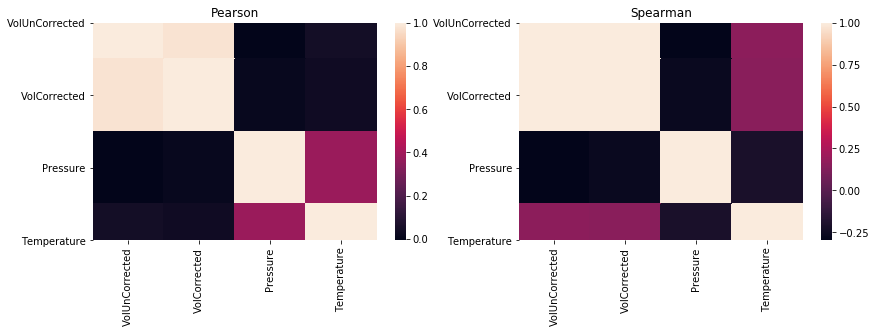

In [23]:
lista = list(range(151,170))
data1 = data[data['id_sitio'].isin(lista)]

numer = data1.select_dtypes([float])
objeto= data1.select_dtypes(['object'])

plt.figure(figsize =(14,4))
plt.subplot(1,2,1)
sns.heatmap(numer.corr(method ='pearson'))
plt.title('Pearson')
plt.subplot(1,2,2)
sns.heatmap(numer.corr(method ='spearman'))
plt.title('Spearman')

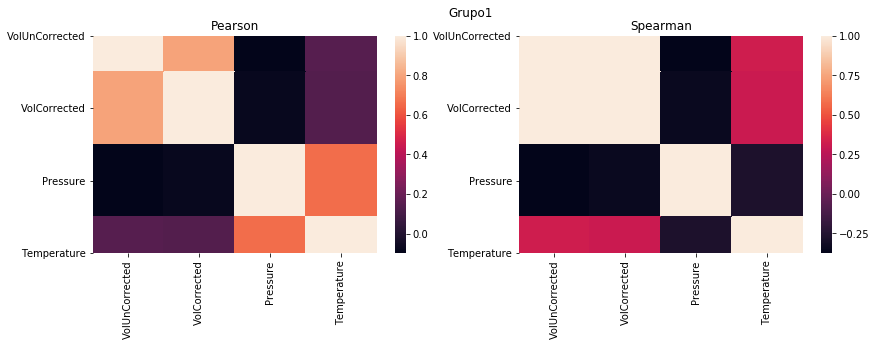

In [24]:
lista = [153, 154, 157, 160, 165, 167]
data1 = data[data['id_sitio'].isin(lista)]
grupo1 = data1.copy()
numer = data1.select_dtypes([float])
objeto= data1.select_dtypes(['object'])

fig = plt.figure(figsize =(14,4))
plt.subplot(1,2,1)
sns.heatmap(numer.corr(method ='pearson'))
plt.title('Pearson')
plt.subplot(1,2,2)
sns.heatmap(numer.corr(method ='spearman'))
plt.title('Spearman')
fig.suptitle('Grupo1')
plt.show()

In [25]:
data1['id_sitio'].unique()

array([153, 154, 157, 165, 167, 160], dtype=object)

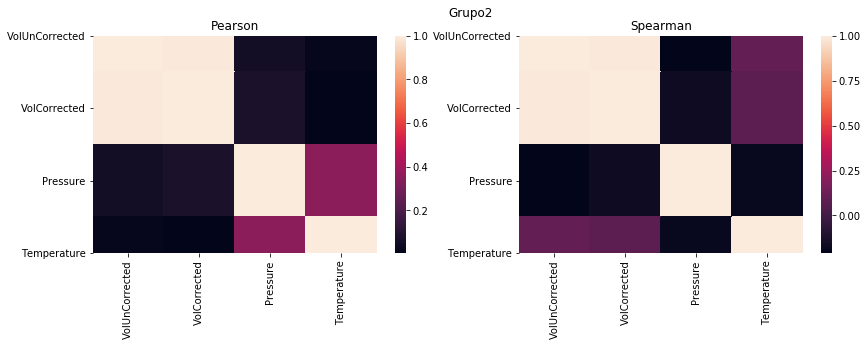

In [26]:
lista = [151, 152, 155, 156, 158, 159, 161, 162, 163, 164, 166, 168, 169, 170]

data1 = data[data['id_sitio'].isin(lista)]
grupo2 = data1.copy()
numer = data1.select_dtypes([float])
objeto= data1.select_dtypes(['object'])

fig = plt.figure(figsize =(14,4))
plt.subplot(1,2,1)
sns.heatmap(numer.corr(method ='pearson'))
plt.title('Pearson')
plt.subplot(1,2,2)
sns.heatmap(numer.corr(method ='spearman'))
plt.title('Spearman')
fig.suptitle('Grupo2')
plt.show()

In [27]:
data1['id_sitio'].unique()

array([163, 151, 152, 155, 156, 158, 159, 161, 162, 164, 166, 168, 169,
       170], dtype=object)

Text(0.5, 0.98, '166')

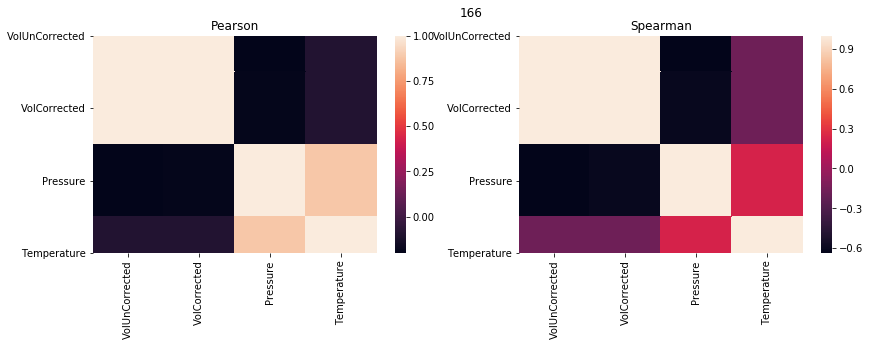

In [28]:

lista = [166]

data1 = data[data['id_sitio'].isin(lista)]

numer = data1.select_dtypes([float])
objeto= data1.select_dtypes(['object'])

fig = plt.figure(figsize =(14,4))
plt.subplot(1,2,1)
sns.heatmap(numer.corr(method ='pearson'))
plt.title('Pearson')
plt.subplot(1,2,2)
sns.heatmap(numer.corr(method ='spearman'))
plt.title('Spearman')
fig.suptitle('166')

In [29]:
data1['id_sitio'].unique()

array([166], dtype=object)

In [30]:
# for i in range(151,170):
#     lista = [i]

#     data1 = data[data['id_sitio'].isin(lista)]

#     numer = data1.select_dtypes([float])
#     objeto= data1.select_dtypes(['object'])

#     fig = plt.figure(figsize =(14,4))
#     plt.subplot(1,2,1)
#     sns.heatmap(numer.corr(method ='pearson'))
#     plt.title('Pearson')
#     plt.subplot(1,2,2)
#     sns.heatmap(numer.corr(method ='spearman'))
#     plt.title('Spearman')
#     fig.suptitle('id_sitio: {}'.format(i))

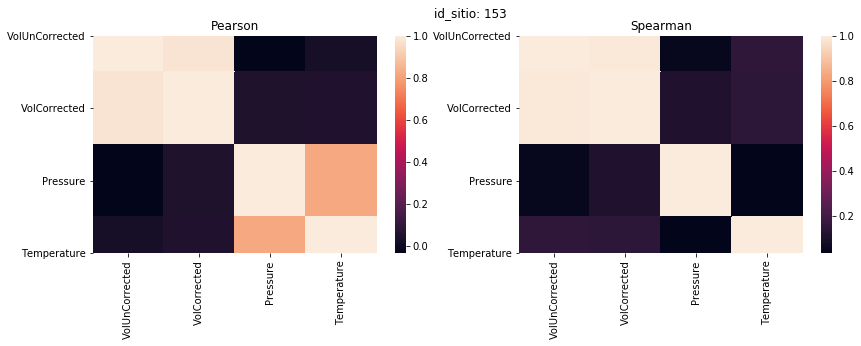

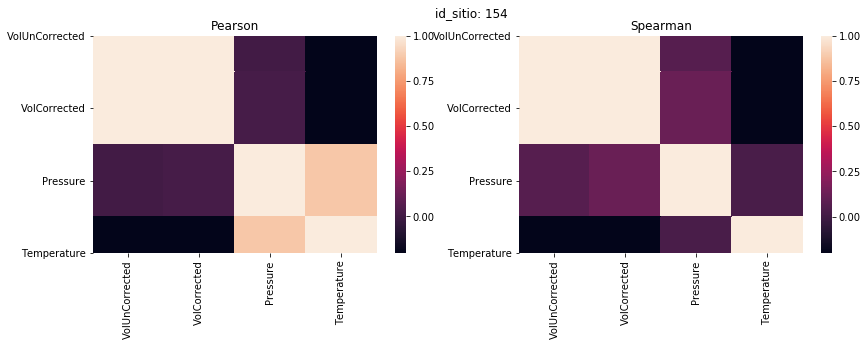

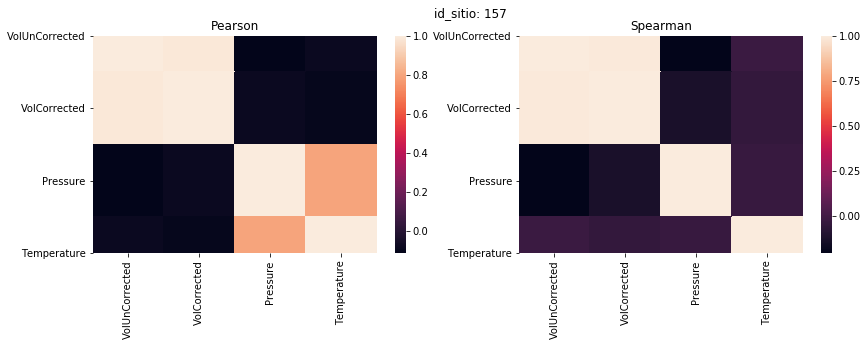

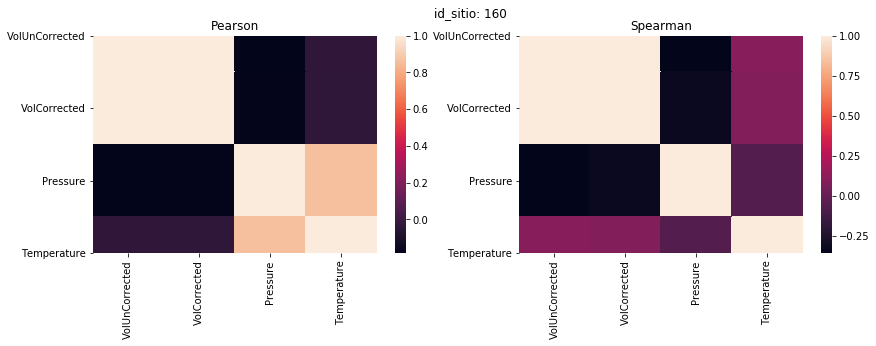

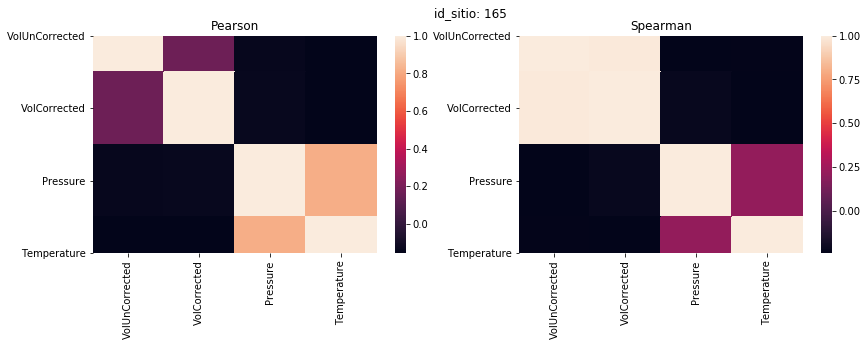

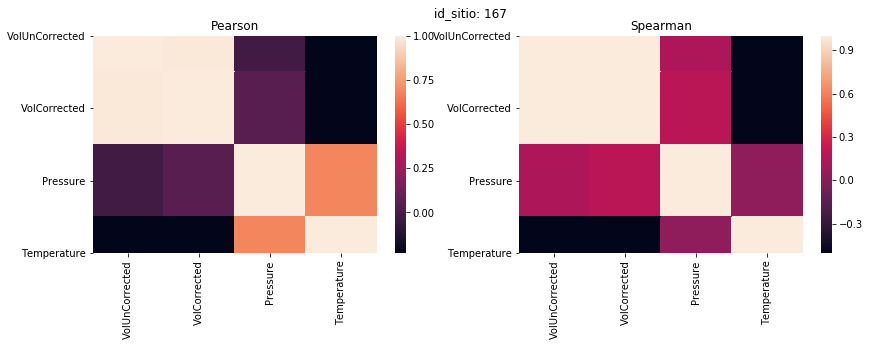

In [31]:

for i in [153, 154, 157, 160, 165, 167]:
    lista = [i]

    data1 = data[data['id_sitio'].isin(lista)]

    numer = data1.select_dtypes([float])
    objeto= data1.select_dtypes(['object'])

    fig = plt.figure(figsize =(14,4))
    plt.subplot(1,2,1)
    sns.heatmap(numer.corr(method ='pearson'))
    plt.title('Pearson')
    plt.subplot(1,2,2)
    sns.heatmap(numer.corr(method ='spearman'))
    plt.title('Spearman')
    fig.suptitle('id_sitio: {}'.format(i))

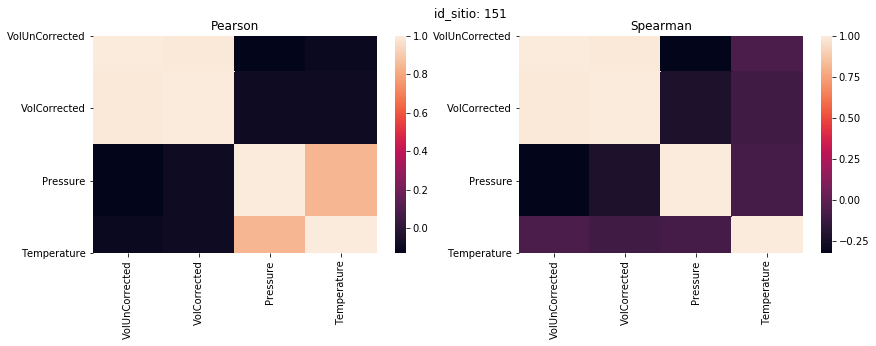

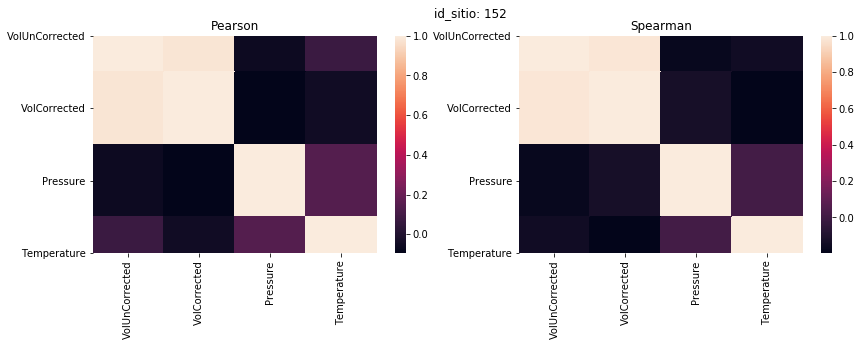

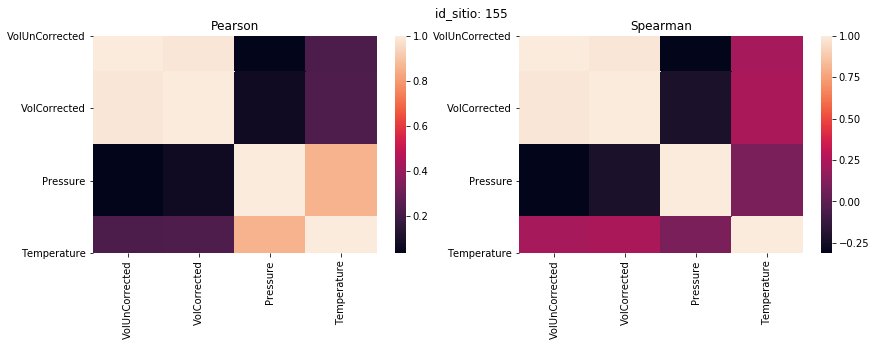

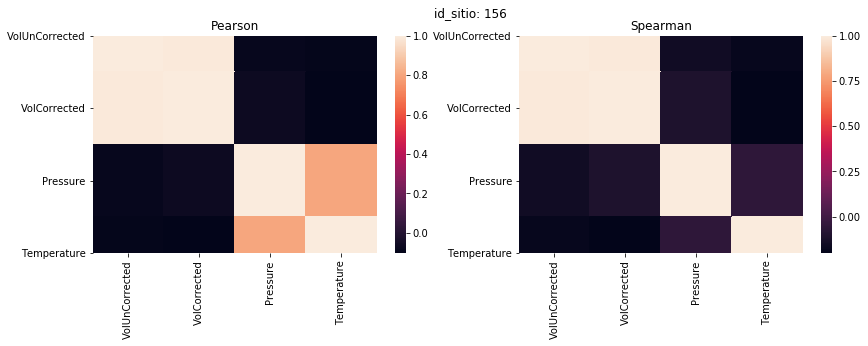

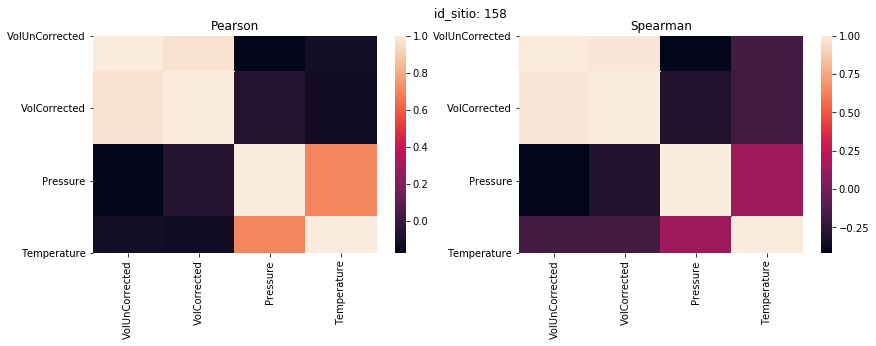

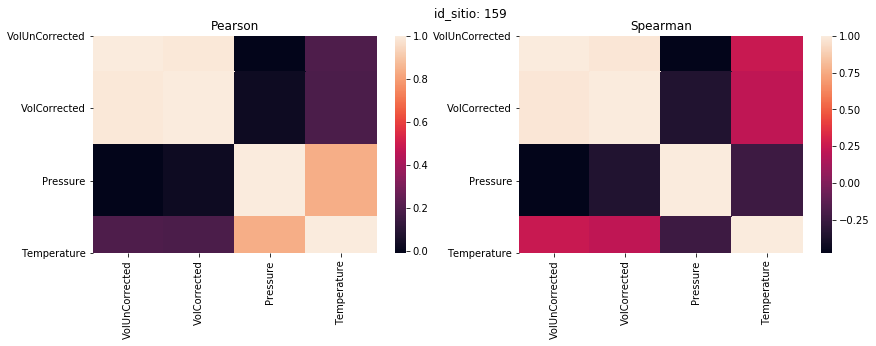

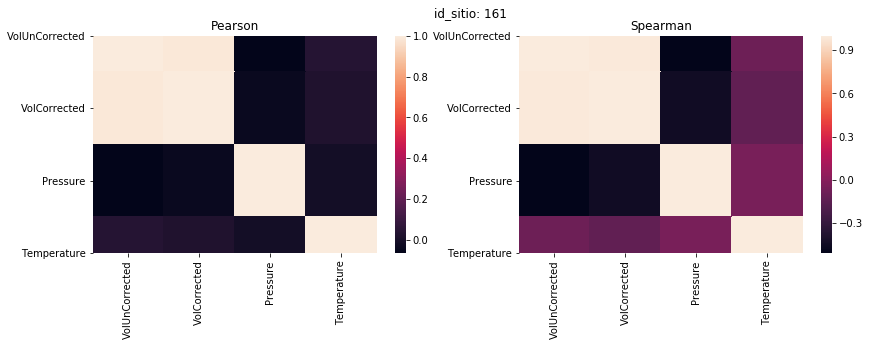

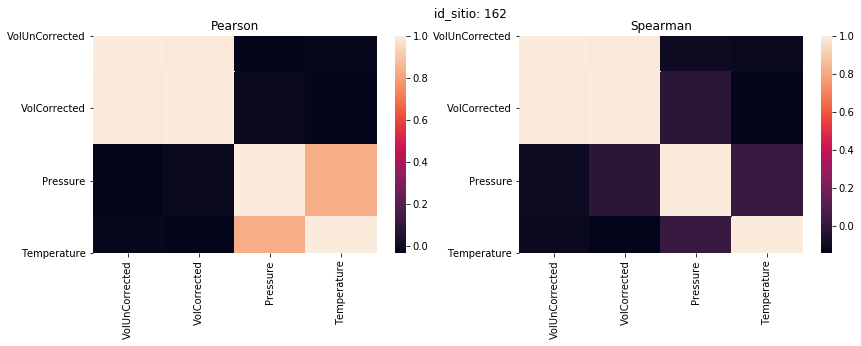

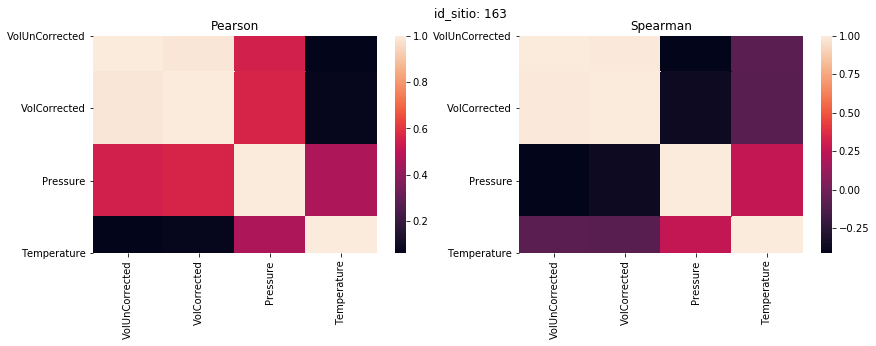

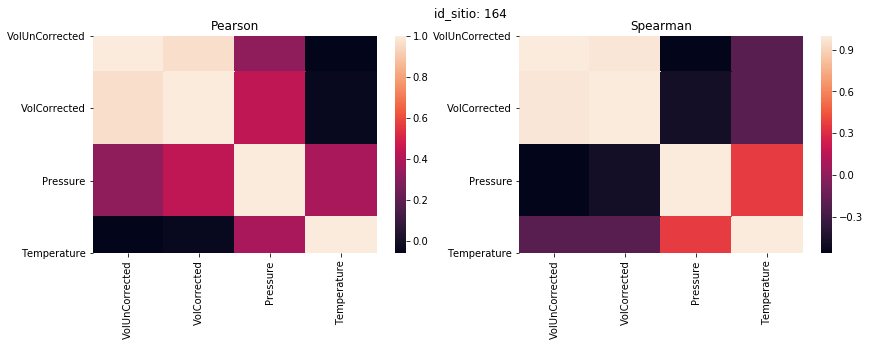

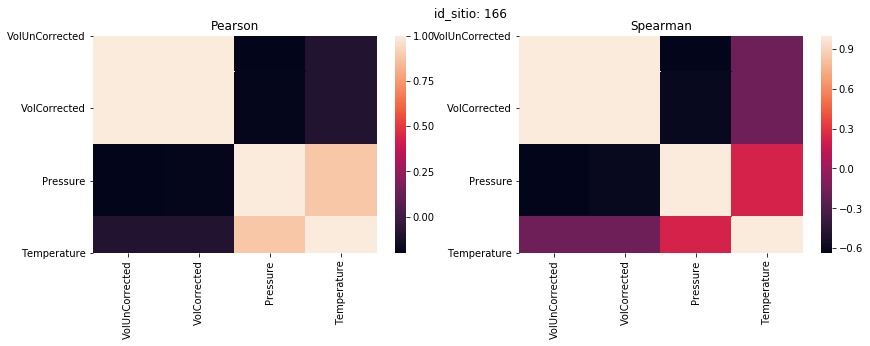

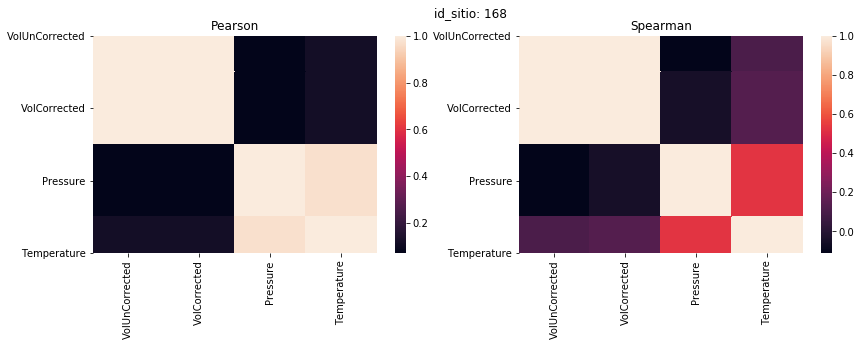

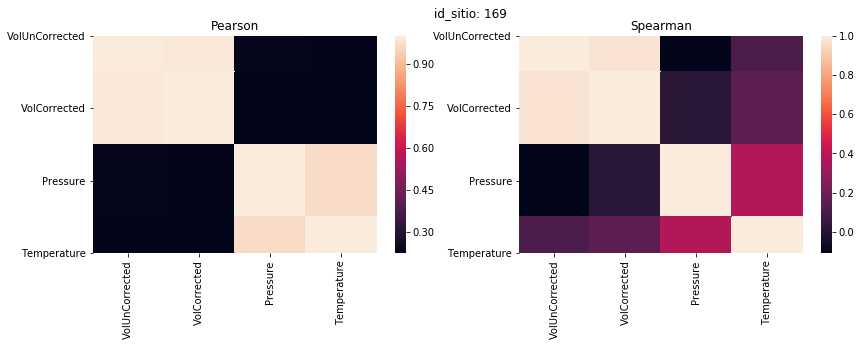

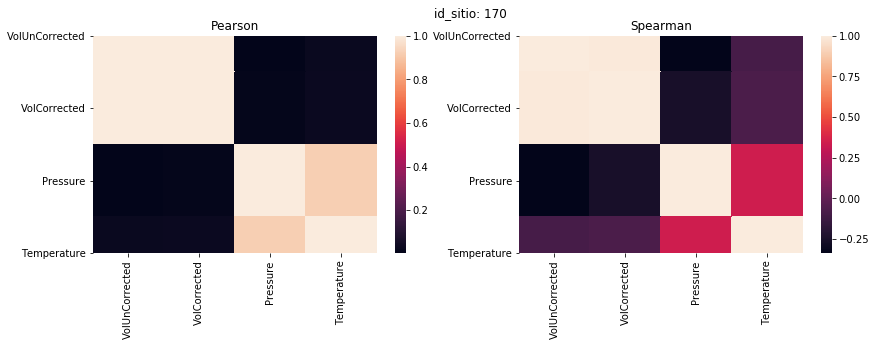

In [32]:

for i in  [151, 152, 155, 156, 158, 159, 161, 162, 163, 164, 166, 168, 169, 170]:
    lista = [i]

    data1 = data[data['id_sitio'].isin(lista)]

    numer = data1.select_dtypes([float])
    objeto= data1.select_dtypes(['object'])

    fig = plt.figure(figsize =(14,4))
    plt.subplot(1,2,1)
    sns.heatmap(numer.corr(method ='pearson'))
    plt.title('Pearson')
    plt.subplot(1,2,2)
    sns.heatmap(numer.corr(method ='spearman'))
    plt.title('Spearman')
    fig.suptitle('id_sitio: {}'.format(i))

In [33]:

numer = grupo1.select_dtypes([float])
objeto= grupo1.select_dtypes(['object'])

In [34]:
numer.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,VolUnCorrected,VolCorrected,Pressure,Temperature
count,9703.000000,9703.000000,9692.000000,9692.000000
mean,658.294047,10995.215795,230.969453,26.816961
std,349.645208,4757.796409,16.012464,2.169231
min,0.000000,0.000000,0.000000,0.000000
25%,435.235000,7392.185000,230.447500,26.210000
50%,631.860000,10507.660000,232.870000,26.990000
75%,812.995000,13530.955000,235.620000,27.900000
90%,1041.840000,17469.732000,238.440000,28.770000
95%,1177.100000,19749.425000,239.864500,29.160000
99%,1490.087400,24911.522200,242.250000,29.750000


In [35]:
numer = grupo2.select_dtypes([float])
objeto= grupo2.select_dtypes(['object'])
numer.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,VolUnCorrected,VolCorrected,Pressure,Temperature
count,21572.000000,21572.000000,21545.000000,21545.000000
mean,1275.482807,21043.511476,227.175747,26.905825
std,639.532639,10415.599848,24.193832,4.224579
min,-15467.290000,-260075.200000,0.000000,-1.870000
25%,879.200000,14676.290000,227.140000,26.160000
50%,1171.870000,19349.180000,230.880000,27.050000
75%,1582.202500,26249.660000,234.140000,27.990000
90%,2120.688000,34757.131000,237.310000,29.000000
95%,2477.807000,40311.639500,238.790000,30.000000
99%,2901.728300,46914.792300,241.865600,31.600000


In [36]:
grupo1.columns

Index(['id_sitio', 'Daily_Date', 'VolUnCorrected', 'VolCorrected', 'Pressure',
       'Temperature', 'id_RTU', 'Day'],
      dtype='object')

C:\Users\jibar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jibar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


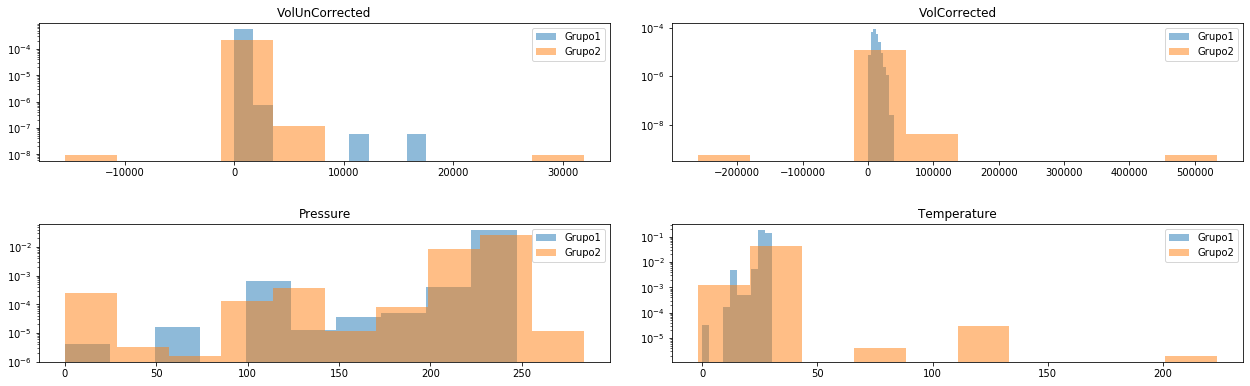

In [37]:
fig = plt.figure(figsize = (18,6))

lim = [-10,1000]
ax1 = plt.subplot(2,2,1)
plt.hist(grupo1['VolUnCorrected'],alpha=0.5,label='Grupo1',density=True,log = True)
plt.hist(grupo2['VolUnCorrected'],alpha=0.5,label='Grupo2',density=True,log = True)
plt.legend(loc='upper right')
ax1.set_title('VolUnCorrected')
# plt.xlim(lim)

ax2 = plt.subplot(2,2,2)
plt.hist(grupo1[ 'VolCorrected'],alpha=0.5,label='Grupo1',density=True,log = True)
plt.hist(grupo2['VolCorrected'],alpha=0.5,label='Grupo2',density=True,log = True)
plt.legend(loc='upper right')
ax2.set_title('VolCorrected')

ax3 = plt.subplot(2,2,3)
plt.hist(grupo1['Pressure'],alpha=0.5,label='Grupo1',density=True,log = True)
plt.hist(grupo2['Pressure'],alpha=0.5,label='Grupo2',density=True,log = True)
plt.legend(loc='upper right')
ax3.set_title('Pressure')

ax4 = plt.subplot(2,2,4)
plt.hist(grupo1['Temperature'],alpha=0.5,label='Grupo1',density=True,log = True)
plt.hist(grupo2['Temperature'],alpha=0.5,label='Grupo2',density=True,log = True)
plt.legend(loc='upper right')
ax4.set_title('Temperature')

fig.tight_layout(pad=3.0)

In [38]:
grupo1.columns

Index(['id_sitio', 'Daily_Date', 'VolUnCorrected', 'VolCorrected', 'Pressure',
       'Temperature', 'id_RTU', 'Day'],
      dtype='object')

(-1000, 5000)

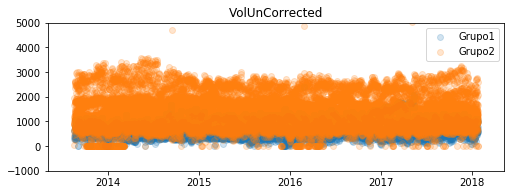

In [50]:
fig = plt.figure(figsize = (18,6))

lim = [-10,1000]
ax1 = plt.subplot(2,2,1)
plt.scatter(x =grupo1['Day'] ,y = grupo1['VolUnCorrected'],alpha=0.2,label='Grupo1')
plt.scatter(x = grupo2['Day'] ,y = grupo2['VolUnCorrected'],alpha=0.2,label='Grupo2')
plt.legend(loc='upper right')
ax1.set_title('VolUnCorrected')
plt.ylim(-1000,5000)

<Figure size 1008x1008 with 0 Axes>

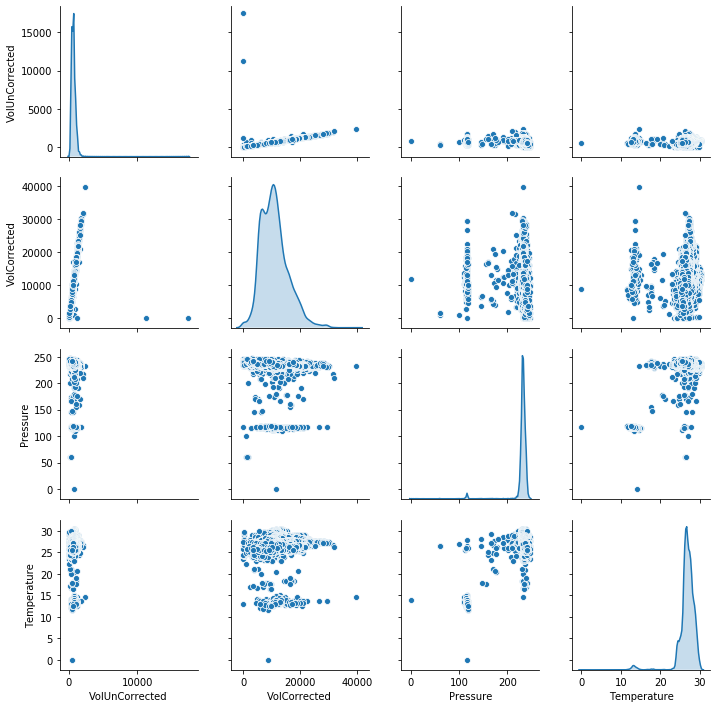

In [52]:
plt.figure(figsize=(14, 14))
numer = grupo1.select_dtypes([float])
objeto= grupo1.select_dtypes(['object'])
sns.pairplot(numer, diag_kind='kde');

<Figure size 1008x1008 with 0 Axes>

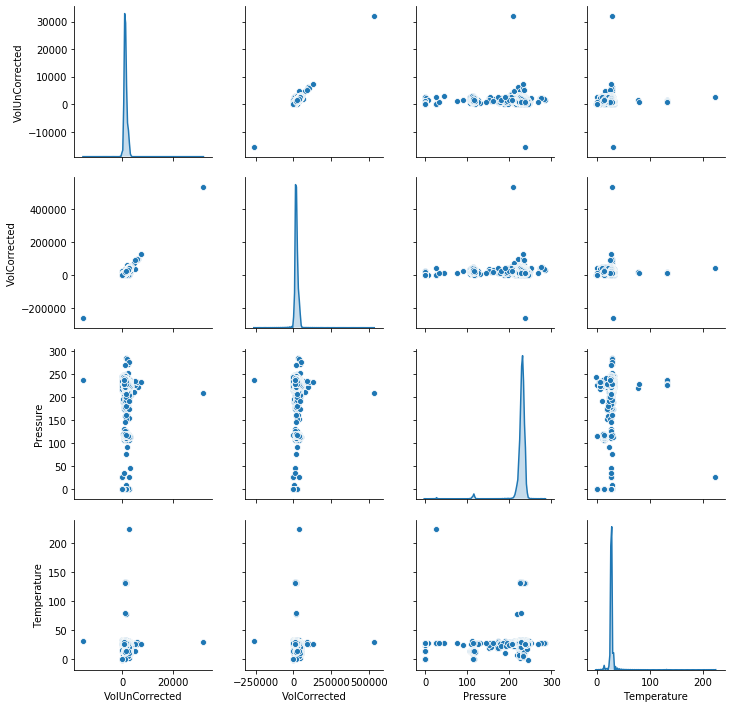

In [55]:
plt.figure(figsize=(14, 14))
numer = grupo2.select_dtypes([float])
objeto= grupo2.select_dtypes(['object'])
sns.pairplot(numer, diag_kind='kde');
